In [1]:
import random
import pandas as pd

# 학생 데이터 생성
def generate_student_data(num_students):
    student_data = []
    for i in range(1, num_students+1):
        student_number = f'{i:03}'  # 학생번호 생성 (예: 001, 002, ...)
        grade = random.randint(1, 3)  # 학년 랜덤 생성 (1~3 중 선택)
        english_score = random.randint(60, 100)  # 영어 점수 랜덤 생성 (60~100 사이)
        korean_score = random.randint(60, 100)  # 국어 점수 랜덤 생성 (60~100 사이)
        math_score = random.randint(60, 100)  # 수학 점수 랜덤 생성 (60~100 사이)
        total_score = english_score + korean_score + math_score  # 전체 성적 계산

        student_data.append([
            student_number,
            grade,
            english_score,
            korean_score,
            math_score,
            total_score
        ])

    # 전체 성적에 따라 순위 매기기
    student_data = sorted(student_data, key=lambda x: x[5], reverse=True)
    for i, student in enumerate(student_data):
        student.append(i + 1)

    return student_data

# 10명의 학생 데이터 생성
students = generate_student_data(10)

# 데이터프레임 생성
df = pd.DataFrame(students, columns=['학생번호', '학년', '영어', '국어', '수학', '전체성적', '전체성적순위'])

# 생성된 데이터프레임 출력
print(df)

  학생번호  학년  영어   국어  수학  전체성적  전체성적순위
0  008   2  94   98  91   283       1
1  010   3  79   89  91   259       2
2  007   1  71   88  99   258       3
3  001   3  95  100  62   257       4
4  003   2  62   90  90   242       5
5  005   3  61   96  81   238       6
6  002   1  75   86  70   231       7
7  004   2  65   67  81   213       8
8  009   2  66   71  64   201       9
9  006   3  60   65  67   192      10


In [2]:
summary_df = df.copy()
summary_df['영어_deviation'] = summary_df['영어'] - summary_df['영어'].mean()
summary_df['수학_deviation'] = summary_df['수학'] - summary_df['수학'].mean()
summary_df['product of deviations'] = summary_df['영어_deviation'] * summary_df['수학_deviation']
summary_df

,학생번호,학년,영어,국어,수학,전체성적,전체성적순위,영어_deviation,수학_deviation,product of deviations
0,008,2,94,98,91,283,1,21.2,11.4,241.68
1,010,3,79,89,91,259,2,6.2,11.4,70.68
2,007,1,71,88,99,258,3,-1.8,19.4,-34.92
3,001,3,95,100,62,257,4,22.2,-17.6,-390.72
4,003,2,62,90,90,242,5,-10.8,10.4,-112.32
5,005,3,61,96,81,238,6,-11.8,1.4,-16.52
6,002,1,75,86,70,231,7,2.2,-9.6,-21.12
7,004,2,65,67,81,213,8,-7.8,1.4,-10.92
8,009,2,66,71,64,201,9,-6.8,-15.6,106.08
9,006,3,60,65,67,192,10,-12.8,-12.6,161.28


In [ ]:
summary_df['product of deviations'].mean()

In [ ]:
# 12.47로 영어점수와 수학점수는 양의 상관관계에 있다고 할 수 있습니다.

# 상관계수

앞에서 공분산을 계산하여 데이터의 상관관계를 표현했습니다. 보통 공분산을 계산할때는 단위 * 단위로 표현되기 때문에 표준편차처럼 우리가 사용하는 단위의 값으로 계산하는 것이 핑료합니다. 공분산을 각 데이터의 표준편차로 나누면 되는데요.

상관계수는 반드시 -1 또는 1사이의 값을 취하고, 양의 상관계수면 1에 가까워지고 음의 상관계수면 -1에 가까워 집니다. 상관이 없으면 0에 가까워지구요.

In [ ]:
import numpy as np

In [ ]:
en_scores = np.array(df['영어'])[:10]
ma_scores = np.array(df['수학'])[:10]
ko_scores = np.array(df['국어'])[:10]

상관계수는 0.164로 약한 약의 상관관계를 보입니다. 상관관계가 어느정도가 되야 유의한 상관관계를 가진다라고는 말할수는 없습니다.만 보통 0.7~8정도면 강한 양의 상관관계가 있다고 합니다.

In [ ]:
np.cov(en_scores, ma_scores ,ddof = 0)[0,1] / (np.std(en_scores) * np.std(ma_scores))

0.16429773618245846

In [ ]:
np.corrcoef(en_scores, ma_scores)

array([[1.        , 0.16429774],
       [0.16429774, 1.        ]])

In [ ]:
summary_df.corr()

<ipython-input-13-c93b2ccba746>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  summary_df.corr()


,학년,영어,국어,수학,전체성적,전체성적순위,영어_deviation,수학_deviation,product of deviations
학년,1.000000,-0.538851,0.230666,0.015164,-0.033284,-0.022288,-0.538851,0.015164,-0.166141
영어,-0.538851,1.000000,-0.077939,0.164298,0.426911,-0.435542,1.000000,0.164298,0.730688
국어,0.230666,-0.077939,1.000000,-0.060179,0.642849,-0.528115,-0.077939,-0.060179,-0.067496
수학,0.015164,0.164298,-0.060179,1.000000,0.627275,-0.664479,0.164298,1.000000,0.655392
전체성적,-0.033284,0.426911,0.642849,0.627275,1.000000,-0.944520,0.426911,0.627275,0.629476
전체성적순위,-0.022288,-0.435542,-0.528115,-0.664479,-0.944520,1.000000,-0.435542,-0.664479,-0.684472
영어_deviation,-0.538851,1.000000,-0.077939,0.164298,0.426911,-0.435542,1.000000,0.164298,0.730688
수학_deviation,0.015164,0.164298,-0.060179,1.000000,0.627275,-0.664479,0.164298,1.000000,0.655392
product of deviations,-0.166141,0.730688,-0.067496,0.655392,0.629476,-0.684472,0.730688,0.655392,1.000000


# 2차원 데이터의 시각화

In [ ]:
import matplotlib.pyplot as plt

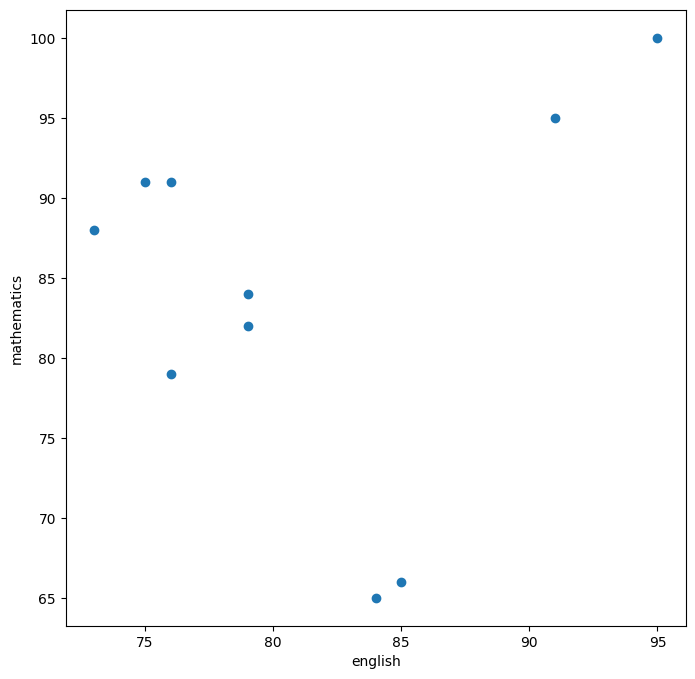

In [ ]:
english_scores = np.array(df['영어'])
math_scores = np.array(df['수학'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

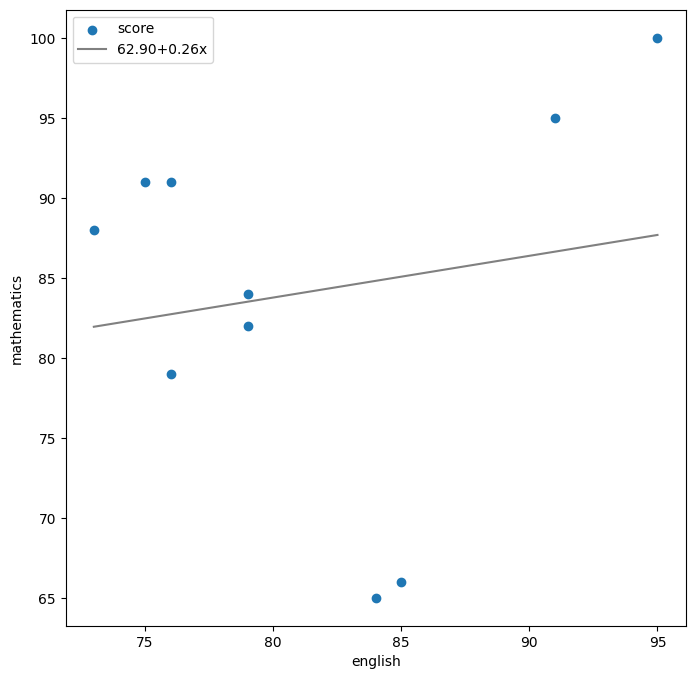

In [ ]:
# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend(loc='upper left')

plt.show()

# 상관계수에 대한 고찰

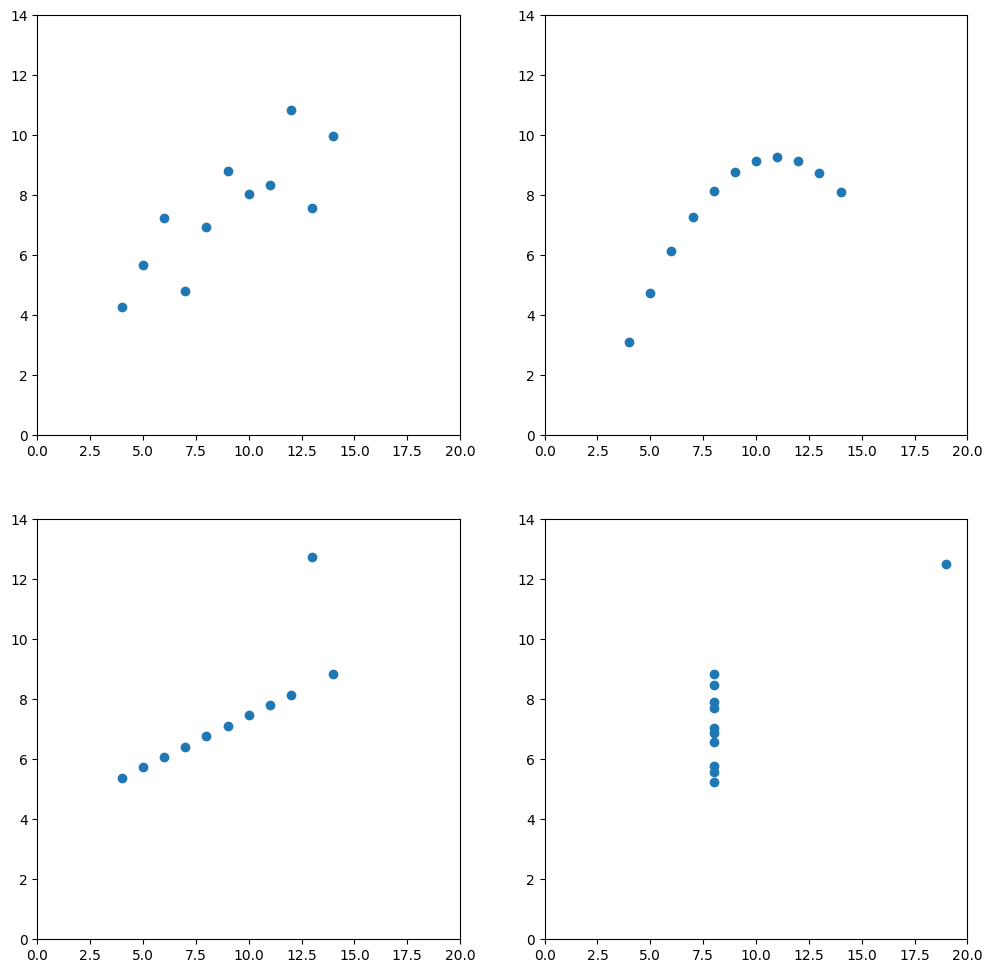

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Anscombe's quartet
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

# create matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot each dataset
datasets = [(x, y1), (x, y2), (x, y3), (x4, y4)]
for ax, data in zip(axs.flatten(), datasets):
    ax.scatter(*data)
    ax.set(xlim=(0, 20), ylim=(0, 14))

plt.show()

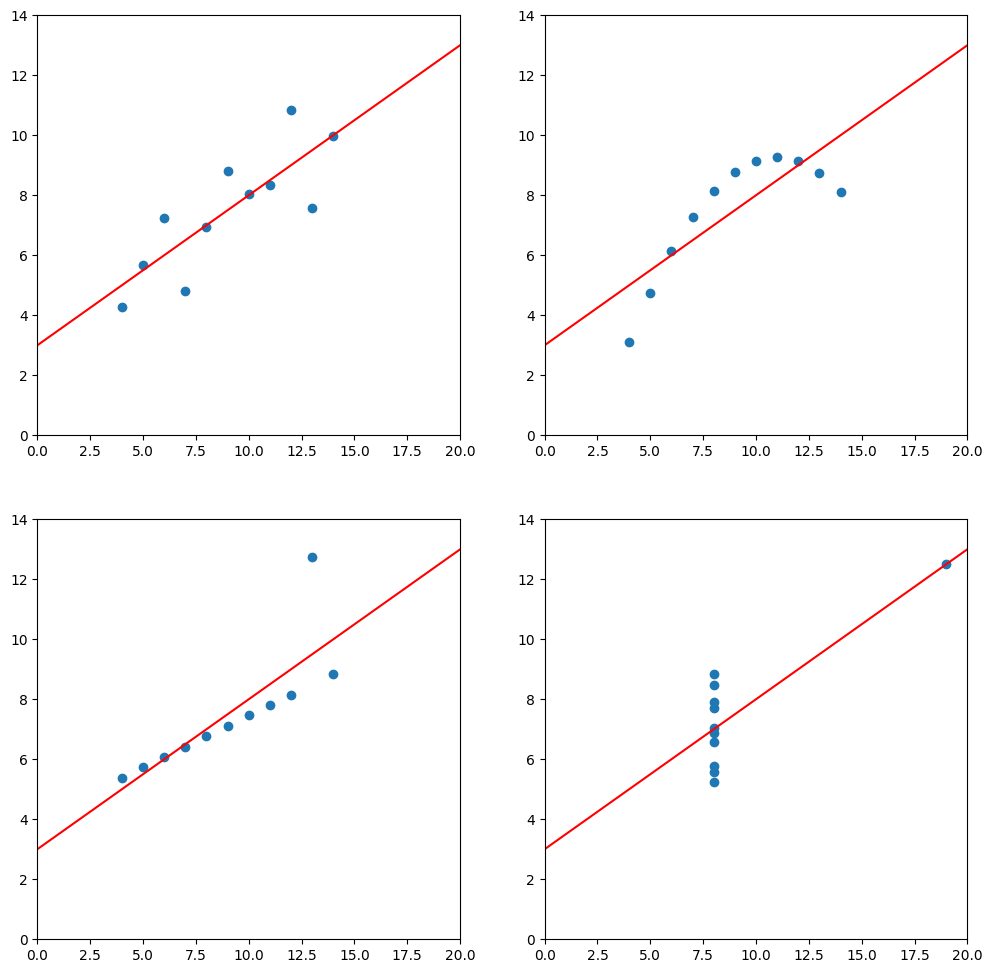

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Anscombe's quartet
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

# create matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot each dataset
datasets = [(x, y1), (x, y2), (x, y3), (x4, y4)]
for ax, data in zip(axs.flatten(), datasets):
    ax.scatter(*data)
    ax.set(xlim=(0, 20), ylim=(0, 14))

    # Fitting linear regression and add it to the plot
    p = np.polyfit(*data, 1)  # degree 1 polynomial fit
    x_vals = np.array(ax.get_xlim())
    y_vals = p[0] * x_vals + p[1]
    ax.plot(x_vals, y_vals, '-', color='red')

plt.show()